In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# creating synthetic dataset

n = 200
x = 6*np.random.rand(n,1)-3
y = 0.8*x**2 + 0.9* x + 2 + np.random.randn(n,1)

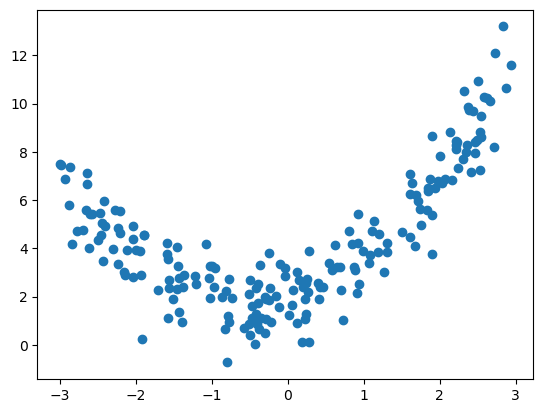

In [3]:
plt.scatter(x,y)

In [5]:
# Splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 20)

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = lr.predict(x_test)

In [10]:
from sklearn.metrics import r2_score

print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.15898530728640758


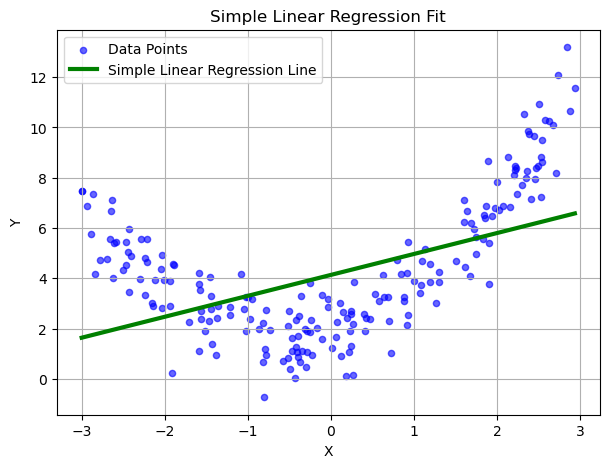

In [32]:
# Linear Regression Line

x_grid = np.linspace(min(x), max(x), 100).reshape(-1, 1)

y_linear_pred = lr.predict(x_grid)

plt.figure(figsize=(7, 5))


plt.scatter(x, y, 
            color='blue', 
            label='Data Points', 
            s=20, 
            alpha=0.6)


plt.plot(x_grid, y_linear_pred, 
         color='green', 
         label='Simple Linear Regression Line', 
         linewidth=3) 


plt.title('Simple Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree = 2)

In [14]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [15]:
x_train_poly[0]

array([1.        , 1.86627073, 3.48296643])

In [16]:
lr_poly = LinearRegression()

In [17]:
lr_poly.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred_poly = lr_poly.predict(x_test_poly)

In [21]:
print("R2 Score : ",r2_score(y_test,y_pred_poly))

R2 Score :  0.8586794286829065


In [23]:
lr_poly.coef_
lr_poly.intercept_

array([1.92880888])

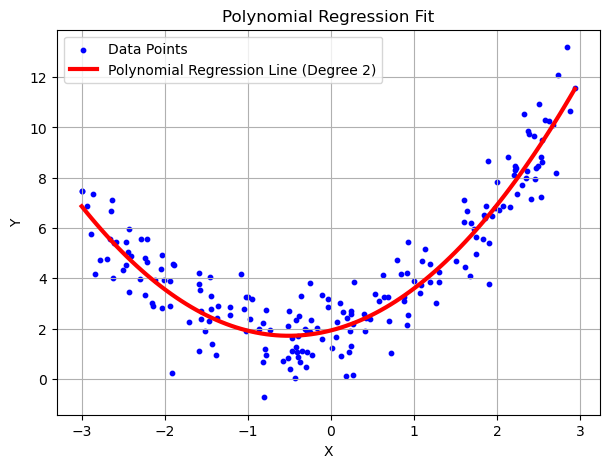

In [33]:
# Polynomial Regression Line

x_grid = np.linspace(min(x), max(x), 100).reshape(-1, 1)


x_grid_poly = poly.transform(x_grid)
y_grid_pred = lr_poly.predict(x_grid_poly)


plt.figure(figsize=(7, 5))
plt.scatter(x, y, color='blue', label='Data Points', s=10) 
plt.plot(x_grid, y_grid_pred, color='red', label='Polynomial Regression Line (Degree 2)', linewidth=3)

plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

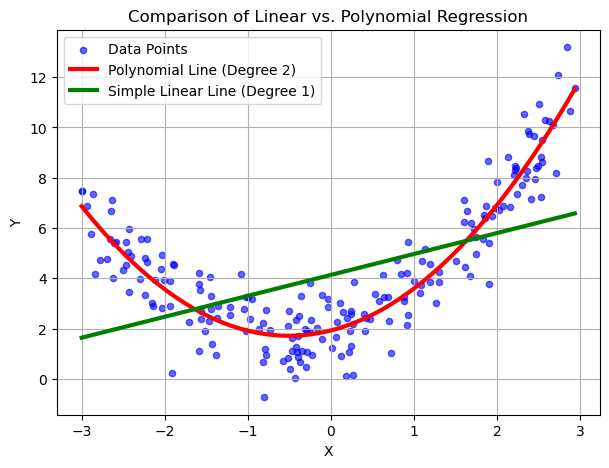

In [34]:
# Both linear and multiple Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

x_grid = np.linspace(min(x), max(x), 100).reshape(-1, 1)


y_linear_pred = lr.predict(x_grid)


x_grid_poly = poly.transform(x_grid)
y_poly_pred = lr_poly.predict(x_grid_poly)

plt.figure(figsize=(7, 5))

plt.scatter(x, y, 
            color='blue', 
            label='Data Points', 
            s=20, 
            alpha=0.6)


plt.plot(x_grid, y_poly_pred, 
         color='red', 
         label='Polynomial Line (Degree 2)', 
         linewidth=3)


plt.plot(x_grid, y_linear_pred, 
         color='green',
         label='Simple Linear Line (Degree 1)', 
         linewidth=3) 

plt.title('Comparison of Linear vs. Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()